In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import os
from sklearn.model_selection import train_test_split

In [6]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

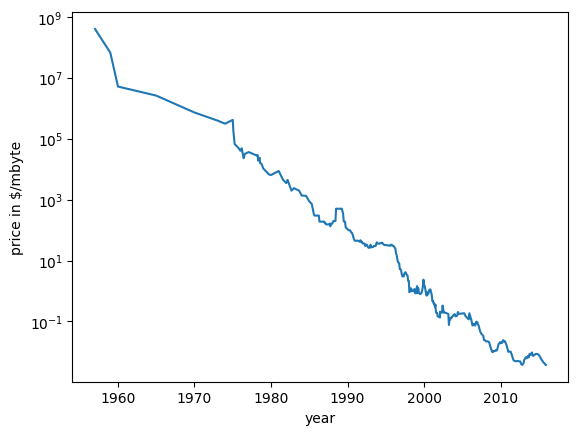

In [13]:
# makes logarithmic scale y axis
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price in $/mbyte")
plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [22]:
X_train = np.array(data_train.date)[:, np.newaxis]

In [23]:
# we use a log transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

In [24]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [26]:
X_all = np.array(ram_prices.date)[:, np.newaxis]

In [27]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [28]:
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

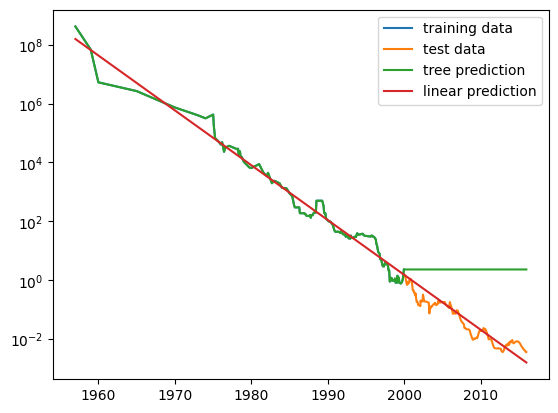

In [29]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="linear prediction")
plt.legend()
plt.show()